# Script 1: Setup - Imports, Data Loading, and Preprocessing

## Explanation
This script sets up the environment. It imports necessary libraries:

- **TensorFlow/Keras** for building and training the neural network
- **NumPy** for numerical operations
- **Matplotlib** for plotting later

It then loads the standard **MNIST dataset**, which is built into Keras. The dataset contains:

- 60,000 images for training
- 10,000 images for testing

Each image is:
- 28x28 pixels
- Grayscale

### Preprocessing Steps

1. **Reshaping for CNNs**
   - Ensure the image data has the shape `(height, width, channels)`
   - For MNIST grayscale images, this is `(28, 28, 1)`
   - This format is required for **Convolutional layers (Conv2D)**
   - We'll keep this shape for models using Conv layers

2. **Normalization**
   - Pixel values range from 0 to 255
   - Normalize to range between 0 and 1 by dividing by `255.0`
   - Helps the neural network train more effectively
   - Convert the data type to `float32` for this calculation

3. **One-Hot Encoding**
   - Labels (`y_train`, `y_test`) are initially digits from 0 to 9
   - For classification with a **Softmax output layer**, convert to "one-hot" format
   - Each label becomes a vector of length 10, where only the index of the digit is 1
   - Example: `5` becomes `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`
   - Use `to_categorical()` from Keras for this

In [3]:
# Script 1: Setup - Imports, Data Loading, and Preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# 1. Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Initial x_train shape: {x_train.shape}") # Output: (60000, 28, 28)
print(f"Initial y_train shape: {y_train.shape}") # Output: (60000,)

# 2. Preprocess Data
# Reshape data for Conv2D layers (add channel dimension)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Convert data types and normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Processed x_train shape: {x_train.shape}") # Output: (60000, 28, 28, 1)
print(f"Processed x_test shape: {x_test.shape}")  # Output: (10000, 28, 28, 1)

# One-hot encode the labels
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print(f"Processed y_train shape: {y_train_cat.shape}") # Output: (60000, 10)
print(f"Processed y_test shape: {y_test_cat.shape}")  # Output: (10000, 10)

# Store results (we'll populate this list in subsequent steps)
model_results = []

print("\nSetup Complete. Data is loaded and preprocessed.")

TensorFlow version: 2.13.0
Initial x_train shape: (60000, 28, 28)
Initial y_train shape: (60000,)
Processed x_train shape: (60000, 28, 28, 1)
Processed x_test shape: (10000, 28, 28, 1)
Processed y_train shape: (60000, 10)
Processed y_test shape: (10000, 10)

Setup Complete. Data is loaded and preprocessed.


# Script 2: Visualize Data & Baseline Model (1 FC Layer)

## Explanation

This script first visualizes a few sample images from the MNIST training set using **Matplotlib**, showing the handwritten digits and their corresponding labels. This helps confirm the data looks as expected.

Then, it defines the **baseline model** as required by Q6:

### Model Architecture

- **Sequential Model**: A linear stack of layers.
- **Flatten Layer**:
  - Converts each image from shape `(28, 28, 1)` to a 1D vector of 784 elements
  - Required because Dense layers need 1D input
  - `input_shape` is specified only in the first layer
- **Dense Hidden Layer**:
  - A fully connected hidden layer
  - Uses 128 neurons (common choice, can be tuned)
  - Activation: `'relu'` (Rectified Linear Unit)
- **Dense Output Layer**:
  - 10 neurons (one for each digit class)
  - Activation: `'softmax'` to output class probabilities

### Compilation Settings

- `loss='categorical_crossentropy'`: Suitable for multi-class classification with one-hot labels
- `optimizer='adam'`: Efficient optimization algorithm
- `metrics=['accuracy']`: Tracks classification accuracy

### Model Summary

- `model.summary()` prints the model architecture
- Shows output shapes and number of trainable parameters

### Training the Model

- `model.fit()` is used to train
  - `x_train`, `y_train_cat`: Input data and labels
  - `batch_size`: Number of samples per training step
  - `epochs`: Total training passes (e.g., 5)
  - `validation_data=(x_test, y_test_cat)`: Validates on test set after each epoch
  - `verbose=1`: Enables progress bars

### Evaluation & Results

- `model.evaluate()`: Computes loss and accuracy on test data
- Store results:
  - Save test accuracy
  - Save number of trainable parameters with `model.count_params()`
  - Store these into `model_results` for later plotting


Visualizing sample training images:


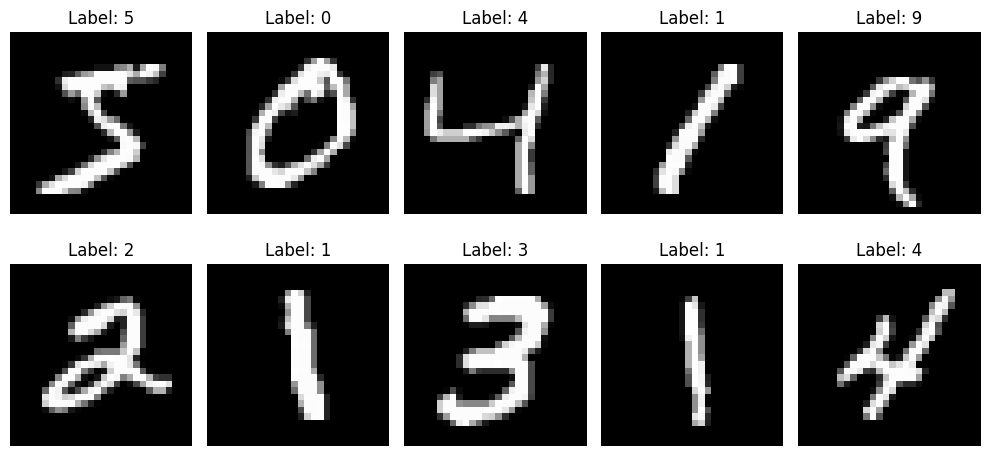


--- Defining Baseline Model (1 FC Layer) ---

Model Summary:
Model: "Baseline_1FC"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

--- Training Baseline Model ---
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2604 - accuracy: 0.9256 - val_loss: 0.1349 - val_accuracy: 0.9588
Epoch 2/5
1875/1875 [===================

In [4]:
# Script 2: Visualize Data & Baseline Model (1 FC Layer)
# Assumes Script 1 has been run and variables (x_train, y_train, etc.) exist

# --- Optional: Visualize some data ---
print("\nVisualizing sample training images:")
plt.figure(figsize=(10, 5))
for i in range(10): # Show first 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray') # Reshape back to 2D for imshow
    plt.title(f"Label: {y_train[i]}") # Use original y_train for labels
    plt.axis('off')
plt.tight_layout()
plt.show()
# --- End Visualization ---


print("\n--- Defining Baseline Model (1 FC Layer) ---")

model_baseline = Sequential([
    # Input Layer: Flatten the 28x28x1 image into a 784 vector
    Flatten(input_shape=input_shape), # input_shape defined in Script 1 as (28, 28, 1)

    # Hidden Layer: One Dense layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),

    # Output Layer: Dense layer with 10 neurons (one for each class) and Softmax activation
    Dense(num_classes, activation='softmax') # num_classes defined in Script 1 as 10
], name="Baseline_1FC")

# Compile the model
model_baseline.compile(loss='categorical_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

# Print model summary to see layers and parameters
print("\nModel Summary:")
model_baseline.summary()

# Train the model
print("\n--- Training Baseline Model ---")
epochs = 5
batch_size = 32 # As used in the PDF
history_baseline = model_baseline.fit(x_train, y_train_cat,
                                      batch_size=batch_size,
                                      epochs=epochs,
                                      validation_data=(x_test, y_test_cat),
                                      verbose=1)

# Evaluate the model on the test set
print("\n--- Evaluating Baseline Model ---")
score_baseline = model_baseline.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test loss: {score_baseline[0]:.4f}")
print(f"Test accuracy: {score_baseline[1]:.4f}")

# Store results (Accuracy, Parameters, Model Name)
baseline_params = model_baseline.count_params()
model_results.append({'name': model_baseline.name,
                      'accuracy': score_baseline[1],
                      'params': baseline_params})

print(f"\nBaseline Model Parameters: {baseline_params}")
print("Baseline Model training and evaluation complete.")

# Script 3: Model with 1 Conv2D + 1 MaxPooling2D Layer

## Explanation

This script defines and evaluates a slightly more complex model incorporating a **convolutional** and a **pooling** layer.

### Conv2D Layer

- This is the first layer and takes the `input_shape=(28, 28, 1)` directly (no Flatten first!)
- `filters=32`: Learns 32 different feature detectors (e.g., edge or corner detectors)
- `kernel_size=(3, 3)`: Each filter is a 3x3 matrix sliding over the image
- `activation='relu'`: Applies the ReLU activation function
- Output: 32 feature maps, typically slightly smaller than 28x28 unless padding is used (Keras uses "same" padding by default)

### MaxPooling2D Layer

- `pool_size=(2, 2)`: Reduces each 2x2 block to its max value
- This downsamples feature maps (e.g., from 28x28 to 14x14)
- Benefits: Reduces spatial dimensions, enhances location robustness, and cuts down parameters

### Flatten Layer

- Converts the 3D output (height × width × filters) into a 1D vector

### Dense Hidden Layer

- Same as the baseline:
  - `128` neurons
  - `activation='relu'`

### Dense Output Layer

- Same as the baseline:
  - `10` neurons (for digit classes 0-9)
  - `activation='softmax'`

### Compile, Train, Evaluate, Store

- Compilation:
  - `optimizer='adam'`
  - `loss='categorical_crossentropy'`
  - `metrics=['accuracy']`
- Training:
  - `epochs=5`, `batch_size=32`
  - `validation_data=(x_test, y_test_cat)`
- Summary:
  - `model.summary()` prints architecture and parameters
- Evaluation:
  - `model.evaluate()` computes final test performance
- Store:
  - Save accuracy and `model.count_params()` into `model_results`

> 🧠 Note: CNNs often achieve **higher accuracy** with **fewer parameters** compared to purely dense models when working with image data.

In [5]:
# Script 3: Model with 1 Conv2D + 1 MaxPooling2D Layer
# Assumes Script 1 & 2 have been run and variables exist

print("\n--- Defining Model_1Conv ---")

model_1conv = Sequential([
    # Convolutional Layer: Learns 32 filters of size 3x3
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape), # input_shape=(28, 28, 1)

    # Pooling Layer: Downsamples the feature map by factor of 2
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten Layer: Converts 2D feature maps to 1D vector
    Flatten(),

    # Dense Hidden Layer: Same as baseline
    Dense(128, activation='relu'),

    # Output Layer: Same as baseline
    Dense(num_classes, activation='softmax') # num_classes=10
], name="Model_1Conv")

# Compile the model (using same settings as baseline)
model_1conv.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Print model summary
print("\nModel Summary:")
model_1conv.summary()

# Train the model
print("\n--- Training Model_1Conv ---")
# Using same epochs and batch_size for comparison
history_1conv = model_1conv.fit(x_train, y_train_cat,
                                batch_size=batch_size, # 32
                                epochs=epochs,      # 5
                                validation_data=(x_test, y_test_cat),
                                verbose=1)

# Evaluate the model
print("\n--- Evaluating Model_1Conv ---")
score_1conv = model_1conv.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test loss: {score_1conv[0]:.4f}")
print(f"Test accuracy: {score_1conv[1]:.4f}")

# Store results
params_1conv = model_1conv.count_params()
model_results.append({'name': model_1conv.name,
                      'accuracy': score_1conv[1],
                      'params': params_1conv})

print(f"\nModel_1Conv Parameters: {params_1conv}")
print("Model_1Conv training and evaluation complete.")

# Compare accuracy with baseline (optional print)
print(f"\nAccuracy Comparison:")
print(f"- {model_results[0]['name']}: {model_results[0]['accuracy']:.4f} accuracy, {model_results[0]['params']} params")
print(f"- {model_results[1]['name']}: {model_results[1]['accuracy']:.4f} accuracy, {model_results[1]['params']} params")


--- Defining Model_1Conv ---

Model Summary:
Model: "Model_1Conv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-train

# Script 4: Model with 2 Conv2D + 2 MaxPooling2D Layers

## Explanation

This script builds upon the previous one by adding another **Conv2D** and **MaxPooling2D** block.

### Block 1 (Same as Script 3)

- **Conv2D**:
  - `filters=32`, `kernel_size=(3, 3)`, `activation='relu'`
  - `input_shape=(28, 28, 1)`
- **MaxPooling2D**:
  - `pool_size=(2, 2)`

### Block 2 (New)

- **Conv2D**:
  - `filters=64`: Increases filter count to learn more complex features
  - `kernel_size=(3, 3)`, `activation='relu'`
- **MaxPooling2D**:
  - `pool_size=(2, 2)`: Further reduces spatial dimensions

### Flatten Layer

- Converts 3D output of pooling layer into a 1D vector

### Dense Hidden Layer

- Same as before:
  - `128` neurons
  - `activation='relu'`

### Dense Output Layer

- Same as before:
  - `10` neurons
  - `activation='softmax'`

### Compile, Train, Evaluate, Store

- **Compilation**:
  - `optimizer='adam'`
  - `loss='categorical_crossentropy'`
  - `metrics=['accuracy']`
- **Training**:
  - `epochs=5`, `batch_size=32`
  - `validation_data=(x_test, y_test_cat)`
- **Summary**:
  - `model.summary()` shows deeper architecture and increased parameters
- **Evaluation**:
  - `model.evaluate()` for final test performance
- **Store**:
  - Save test accuracy and parameter count using `model.count_params()`
  - Append to `model_results`

> 📌 Adding a second convolutional block often improves feature extraction and accuracy, at the cost of increased parameters.

In [6]:
# Script 4: Model with 2 Conv2D + 2 MaxPooling2D Layers
# Assumes Scripts 1, 2, 3 have been run and variables exist

print("\n--- Defining Model_2Conv ---")

model_2conv = Sequential([
    # Block 1
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape), # input_shape=(28, 28, 1)
    MaxPooling2D(pool_size=(2, 2)),

    # Block 2
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten before Dense layers
    Flatten(),

    # Dense Hidden Layer
    Dense(128, activation='relu'),

    # Output Layer
    Dense(num_classes, activation='softmax') # num_classes=10
], name="Model_2Conv")

# Compile the model (using same settings)
model_2conv.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Print model summary
print("\nModel Summary:")
model_2conv.summary()

# Train the model
print("\n--- Training Model_2Conv ---")
# Using same epochs and batch_size for comparison
history_2conv = model_2conv.fit(x_train, y_train_cat,
                                batch_size=batch_size, # 32
                                epochs=epochs,      # 5
                                validation_data=(x_test, y_test_cat),
                                verbose=1)

# Evaluate the model
print("\n--- Evaluating Model_2Conv ---")
score_2conv = model_2conv.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test loss: {score_2conv[0]:.4f}")
print(f"Test accuracy: {score_2conv[1]:.4f}")

# Store results
params_2conv = model_2conv.count_params()
model_results.append({'name': model_2conv.name,
                      'accuracy': score_2conv[1],
                      'params': params_2conv})

print(f"\nModel_2Conv Parameters: {params_2conv}")
print("Model_2Conv training and evaluation complete.")

# Compare accuracy with previous models (optional print)
print(f"\nAccuracy Comparison:")
for result in model_results:
    print(f"- {result['name']}: {result['accuracy']:.4f} accuracy, {result['params']} params")


--- Defining Model_2Conv ---

Model Summary:
Model: "Model_2Conv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 

# Script 5: Plotting Results and Final Analysis

## Explanation

This script focuses on **visualizing** the relationship between model complexity (number of parameters) and performance (test accuracy), and interpreting the findings.

### Data Extraction

- Unpack the `model_results` list
  - It should contain dictionaries for `'Baseline_1FC'`, `'Model_1Conv'`, and `'Model_2Conv'`
  - Separate lists are created for:
    - `model names`
    - `accuracies`
    - `parameter counts`

### Plotting

- **Matplotlib scatter plot**:
  - `plt.scatter()`: Parameters on x-axis, accuracies on y-axis
  - `plt.xlabel()`, `plt.ylabel()`, `plt.title()`: Label axes and title clearly
  - `plt.xscale('log')`: Optional but useful to visualize wide range of parameter values
  - `plt.grid(True)`: Adds gridlines for better readability

### Annotations

- Loop through each point:
  - Add text labels with model names
  - Helps associate each point with its corresponding model

### Display

- `plt.tight_layout()`: Optimizes spacing
- `plt.show()`: Renders the plot visually

> 📊 This visualization helps understand trade-offs: how much model complexity (parameters) affects accuracy. Sometimes, small increases in complexity lead to large performance gains — but not always!


--- Plotting Accuracy vs. Parameters ---


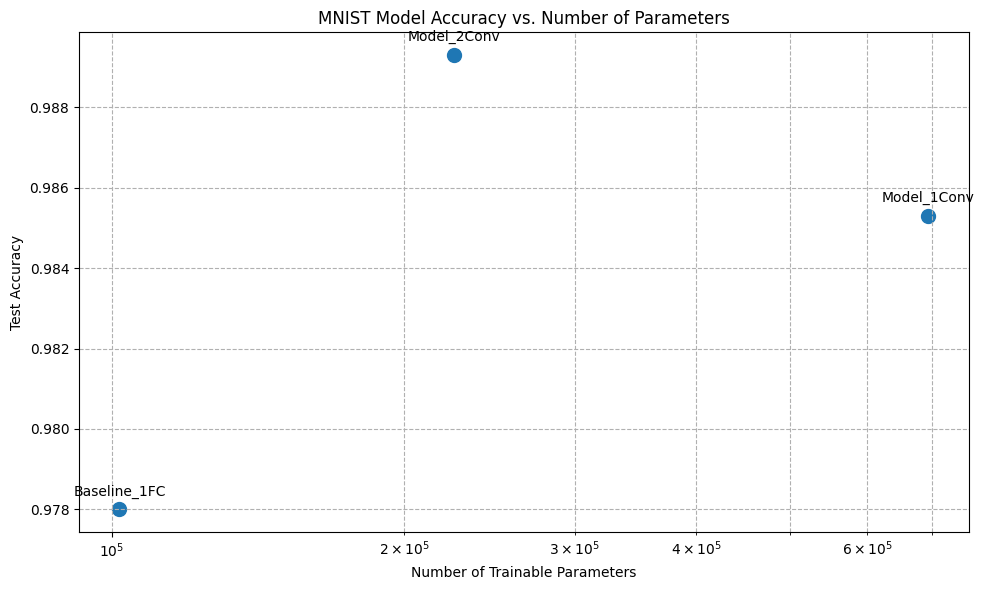


Final Results Summary:
- Baseline_1FC: 0.9780 accuracy, 101770 params
- Model_1Conv: 0.9853 accuracy, 693962 params
- Model_2Conv: 0.9893 accuracy, 225034 params


In [7]:
# Script 5: Plotting Results and Final Analysis
# Assumes Scripts 1-4 have been run and model_results list is populated

print("\n--- Plotting Accuracy vs. Parameters ---")

# Extract data from model_results
model_names = [result['name'] for result in model_results]
accuracies = [result['accuracy'] for result in model_results]
params_list = [result['params'] for result in model_results]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(params_list, accuracies, s=100) # s is marker size

# Add labels and title
plt.title('MNIST Model Accuracy vs. Number of Parameters')
plt.xlabel('Number of Trainable Parameters')
plt.ylabel('Test Accuracy')
plt.xscale('log') # Use log scale for parameters - comment out for linear scale
plt.grid(True, which="both", ls="--") # Add grid lines

# Annotate points with model names
for i, name in enumerate(model_names):
    plt.annotate(name, (params_list[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Display the plot
plt.tight_layout()
plt.show()

print("\nFinal Results Summary:")
for result in model_results:
    print(f"- {result['name']}: {result['accuracy']:.4f} accuracy, {result['params']} params")